# MITDB ECG Classification Project

## Annotations

### Arrhythmia Type List
* N = 'N', 'L', 'R', 'e', 'j'
* SVEB = 'A', 'a', 'J', 'S'
* VEB = 'V', 'E'
* F = 'F'
* Q = '/', 'f'

### Arrhythmia Annotation
* N = Normal beat
* L = Left bundle branch block beat
* R = Right bundle branch block beat
* e = Atrial escape beat
* j = Nodal (junctional) escape beat
* A = Atrial premature beat
* a = Aberrated atrial premature beat
* J = Nodal (junctional) premature beat
* S = Supraventricular premature or ectopic beat (atrial or nodal)
* V = Premature ventricular contraction
* E = Ventricular escape beat
* F = Fusion of ventricular and normal beat
* / = Paced beat
* f = Fusion of paced and normal beat

### The Number of Each Arrhythmia Type
* N = 10001
* L = 8075
* R = 7259
* e = 16
* j = 229
* A = 2546
* a = 150
* J = 83
* S = 2
* V = 7130
* E = 106
* F = 803
* / = 7028
* f = 982

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

### Functions

In [80]:
def import_hb_csv_and_create_df(csv_file):
    csv_df = pd.read_csv(csv_file)
    csv_df.columns = ['Sample #', 'MLII', 'V5']        
    return csv_df

def import_hb_txt_and_create_df(txt_file):
    txt_df = pd.read_fwf(txt_file)
    return txt_df

def merged_hb_dfs_inner(csv_df, txt_df):
    hb_sample_df = pd.merge(csv_df, txt_df, on='Sample #')
    return hb_sample_df

def merged_hb_dfs_outer(csv_df, txt_df):
    hb_sample_df = pd.merge(csv_df, txt_df, how='outer', on='Sample #')
    return hb_sample_df

def plot_heartbeat(csv_df, txt_df):
    MLII = csv_df["MLII"]
    plt.figure(figsize=(20,4)) 
    plt.plot(MLII[1:2000]) 
    
    sample_points = list(txt_df['Sample #'][:8])

    for val in sample_points:
        plt.axvline(x=val, color='r', linestyle='--')
    
    plt.show()
    
def plot_heartbeat_specify_reading_range(csv_df, txt_df, start_read, end_read):
    MLII = csv_df["MLII"]
    plt.figure(figsize=(20,4)) 
    plt.plot(MLII[start_read : end_read]) 
    plt.show()

### Basic EDA (Normal)

In [82]:
csv_df_100 = import_hb_csv_and_create_df('mitDB/100.csv')
txt_df_100 = import_hb_txt_and_create_df('mitDB/100annotations.txt')
merged_df_100 = merged_hb_dfs_inner(csv_df_100, txt_df_100)

In [83]:
merged_df_100.head(1)

,Sample #,MLII,V5,Time,Type,Sub,Chan,Num,Aux
0,18,990,1014,0:00.050,+,0,0,0,(N


In [64]:
print(f"Length of sample CSV: {len(csv_df_100)}")
print(f"Length of sample TXT: {len(txt_df_100)}")

Length of sample CSV: 650000
Length of sample TXT: 2274


In [91]:
merged_df_100_2 = merged_hb_dfs_outer(csv_df_100, txt_df_100)

In [94]:
merged_df_100_2[15:20]

,Sample #,MLII,V5,Time,Type,Sub,Chan,Num,Aux
15,15,989,1011,NaN,NaN,NaN,NaN,NaN,NaN
16,16,988,1013,NaN,NaN,NaN,NaN,NaN,NaN
17,17,987,1014,NaN,NaN,NaN,NaN,NaN,NaN
18,18,990,1014,0:00.050,+,0.0,0.0,0.0,(N
19,19,993,1016,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize different heartbeats

#### [100] Normal heartbeat

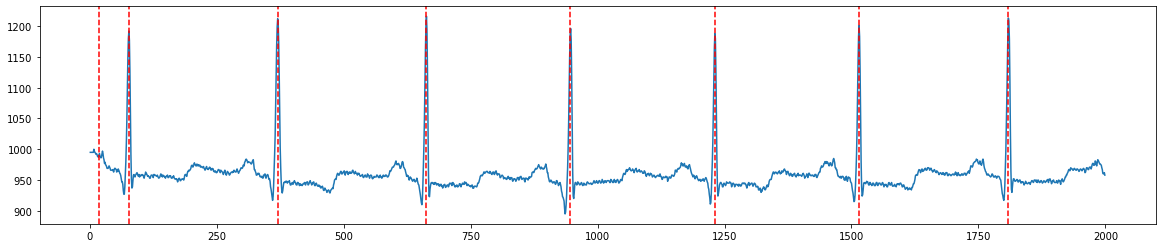

In [65]:
plot_heartbeat(csv_df_100, txt_df_100)

#### [200] Normal / premature Ventricular contraction fluctuation (N/V)

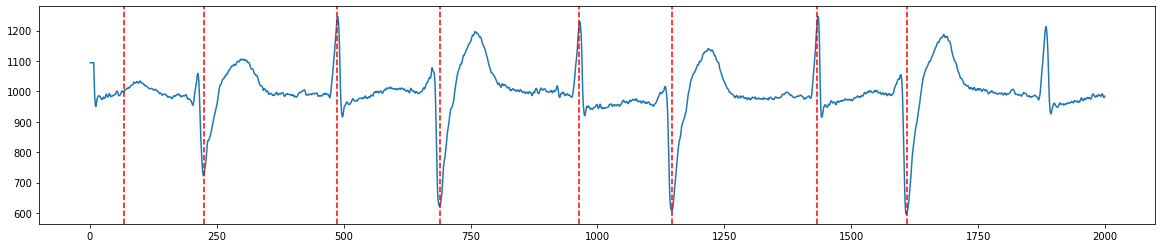

In [84]:
csv_df_200 = import_hb_csv_and_create_df('mitDB/200.csv')
txt_df_200 = import_hb_txt_and_create_df('mitDB/200annotations.txt')
merged_df_200 = merged_hb_dfs_inner(csv_df_200, txt_df_200)

plot_heartbeat(csv_df_200, txt_df_200)

#### [208] Normal / premature Ventricular contraction / Fusion of ventricular and normal beat fluctuation (N/V/F)

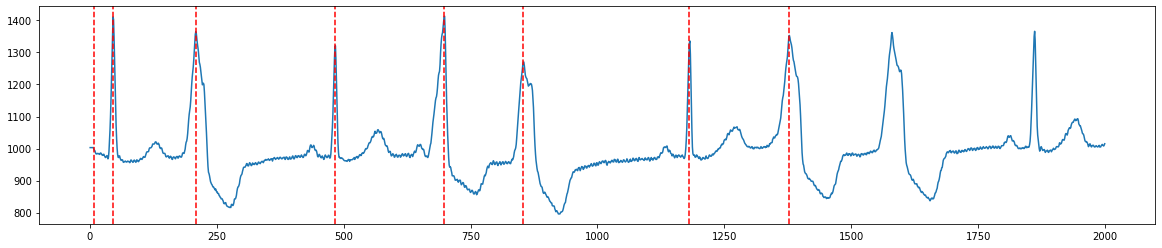

In [85]:
csv_df_208 = import_hb_csv_and_create_df('mitDB/208.csv')
txt_df_208 = import_hb_txt_and_create_df('mitDB/208annotations.txt')
merged_df_208 = merged_hb_dfs_inner(csv_df_208, txt_df_208)

plot_heartbeat(csv_df_208, txt_df_208)

#### [207] Right bundle / premature Ventricular contr / Left bundle / ventricular flutter wave) (R/V/L/!)

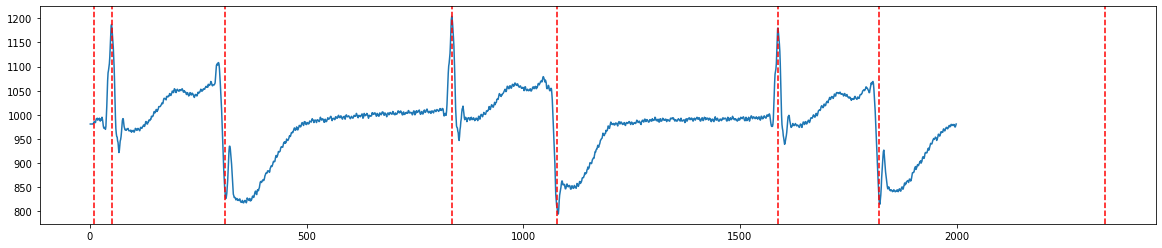

In [86]:
csv_df_207 = import_hb_csv_and_create_df('mitDB/207.csv')
txt_df_207 = import_hb_txt_and_create_df('mitDB/207annotations.txt')
merged_df_207 = merged_hb_dfs_inner(csv_df_207, txt_df_207)

plot_heartbeat(csv_df_207, txt_df_207)

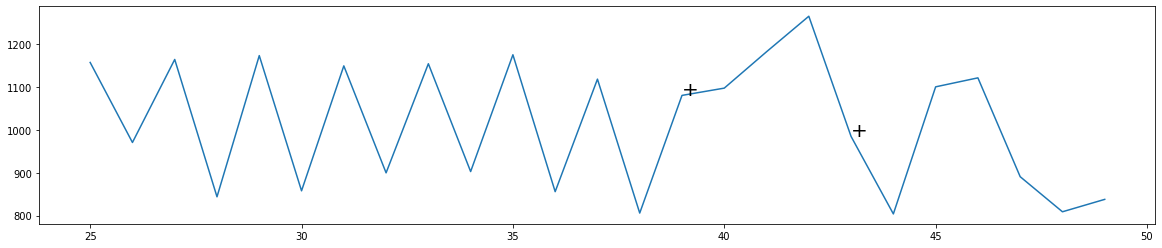

In [73]:
# Plot with '+'
partial_df_207 = merged_df_207[25:50]
plt.figure(figsize=(20,4)) 
plt.plot(partial_df_207['MLII']) 
plt.text(39, 1081, '+', size=20)
plt.text(43, 985, '+', size=20);

#### [212] Normal / Right bundle (N/R)

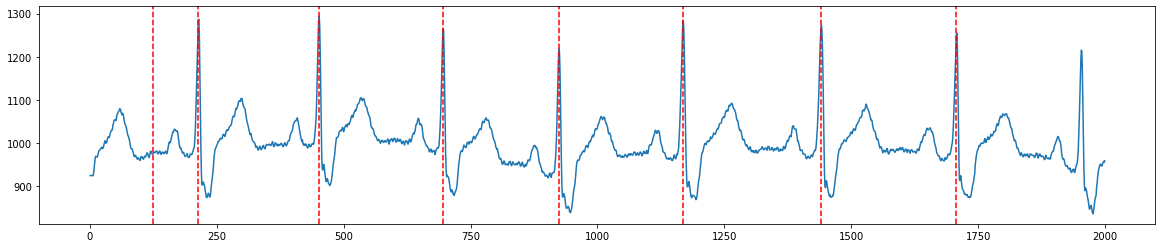

In [87]:
csv_df_212 = import_hb_csv_and_create_df('mitDB/212.csv')
txt_df_212 = import_hb_txt_and_create_df('mitDB/212annotations.txt')
merged_df_212 = merged_hb_dfs_inner(csv_df_212, txt_df_212)

plot_heartbeat(csv_df_212, txt_df_212)

#### [214] Normal / Left bundle (N/L)

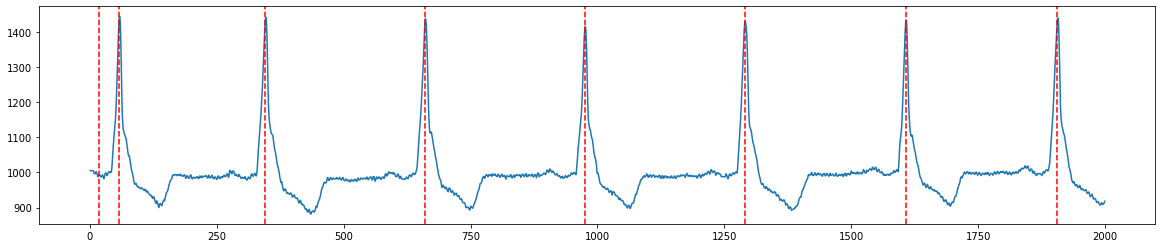

In [88]:
csv_df_214 = import_hb_csv_and_create_df('mitDB/214.csv')
txt_df_214 = import_hb_txt_and_create_df('mitDB/214annotations.txt')
merged_df_214 = merged_hb_dfs_inner(csv_df_214, txt_df_214)

plot_heartbeat(csv_df_214, txt_df_214)

#### [217] Paced beat / fusion of paced and normal / ventricular (//f/N/V)

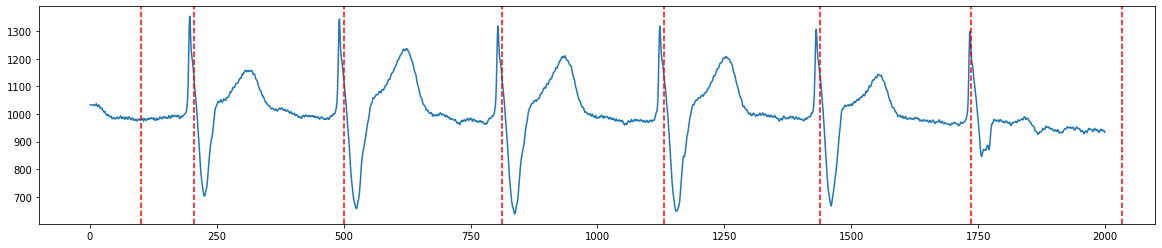

In [89]:
csv_df_217 = import_hb_csv_and_create_df('mitDB/217.csv')
txt_df_217 = import_hb_txt_and_create_df('mitDB/217annotations.txt')
merged_df_217 = merged_hb_dfs_inner(csv_df_217, txt_df_217)

plot_heartbeat(csv_df_217, txt_df_217)

#### [232] Atrial premature beat / Right (A/R)

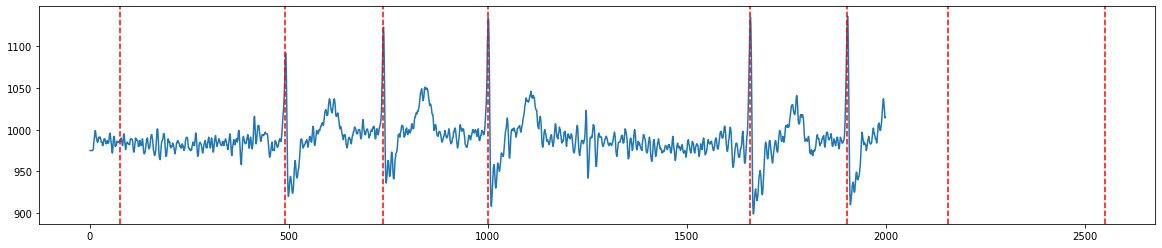

In [90]:
csv_df_232 = import_hb_csv_and_create_df('mitDB/232.csv')
txt_df_232 = import_hb_txt_and_create_df('mitDB/232annotations.txt')
merged_df_232 = merged_hb_dfs_inner(csv_df_232, txt_df_232)

plot_heartbeat(csv_df_232, txt_df_232)

### Preprocessing